In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Sigmoid activation and its derivative
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return x * (1 - x)

class MLP:
    def __init__(self):
        # Network architecture: 2-2-1
        self.W1 = np.random.uniform(-1, 1, (2, 2))  # Input to hidden
        self.b1 = np.random.uniform(-1, 1, (1, 2))
        self.W2 = np.random.uniform(-1, 1, (2, 1))  # Hidden to output
        self.b2 = np.random.uniform(-1, 1, (1, 1))

    def forward(self, X):
        self.hidden = sigmoid(X @ self.W1 + self.b1)
        self.output = sigmoid(self.hidden @ self.W2 + self.b2)
        return self.output

    def backward(self, X, y, lr=0.1):
        # Backpropagation
        error = y - self.output
        delta_output = error * sigmoid_derivative(self.output)
        delta_hidden = delta_output @ self.W2.T * sigmoid_derivative(self.hidden)

        # Update weights
        self.W2 += self.hidden.T @ delta_output * lr
        self.b2 += np.sum(delta_output, axis=0) * lr
        self.W1 += X.T @ delta_hidden * lr
        self.b1 += np.sum(delta_hidden, axis=0) * lr

    def train(self, X, y, epochs=10000):
        for _ in range(epochs):
            self.forward(X)
            self.backward(X, y)

    def predict(self, X):
        return (self.forward(X) > 0.5).astype(int)

# XOR dataset
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([[0], [1], [1], [0]])

# Initialize and train model
mlp = MLP()
mlp.train(X, y)

In [2]:
# Get predicted probabilities and classes
y_pred = mlp.forward(X)      # Probabilities (between 0 and 1)
y_class = mlp.predict(X)     # Class labels (0 or 1)

print("XOR Truth Table with Predictions:\n")
print("Input 1 | Input 2 | Expected | Predicted | Class")
print("-----------------------------------------------")
for i in range(len(X)):
    x1, x2 = X[i]
    expected = y[i][0]
    pred_prob = y_pred[i][0]
    pred_class = y_class[i][0]
    print(f"   {x1}     |    {x2}    |    {expected}     |   {pred_prob:.3f}   |   {pred_class}")

XOR Truth Table with Predictions:

Input 1 | Input 2 | Expected | Predicted | Class
-----------------------------------------------
   0     |    0    |    0     |   0.052   |   0
   0     |    1    |    1     |   0.938   |   1
   1     |    0    |    1     |   0.938   |   1
   1     |    1    |    0     |   0.062   |   0


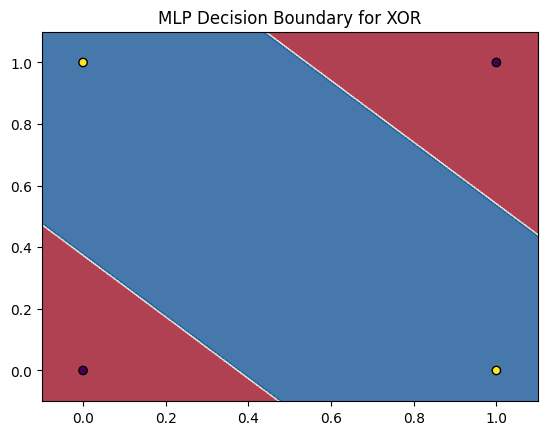

In [7]:
def plot_boundary(model):
    x_min, x_max = -0.1, 1.1
    y_min, y_max = -0.1, 1.1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                         np.linspace(y_min, y_max, 100))
    grid = np.c_[xx.ravel(), yy.ravel()]
    Z = model.predict(grid).ravel().reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.RdBu)
    plt.scatter(X[:,0], X[:,1], c=y.ravel(), edgecolors='k')
    plt.title("MLP Decision Boundary for XOR")
    plt.show()
plot_boundary(mlp)